<a href="https://colab.research.google.com/github/Manu021108/Bharat-Intern/blob/main/Copy_of_CATS_VS_DOGS_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:09<00:00, 119MB/s]
100% 1.06G/1.06G [00:09<00:00, 119MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
#generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#Create cnn model

model=Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
625/625 [==============================] - 80s 127ms/step - loss: 0.0245 - accuracy: 0.9931 - val_loss: 1.1391 - val_accuracy: 0.7736
Epoch 2/10
625/625 [==============================] - 77s 122ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 1.1214 - val_accuracy: 0.7892
Epoch 3/10
625/625 [==============================] - 75s 120ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 1.1569 - val_accuracy: 0.7904
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.0206 - accuracy: 0.9944 - val_loss: 1.2655 - val_accuracy: 0.7988
Epoch 5/10
625/625 [==============================] - 56s 90ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 1.3551 - val_accuracy: 0.7754
Epoch 6/10
625/625 [==============================] - 56s 90ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 1.3281 - val_accuracy: 0.7740
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 1.5020 - val_accura

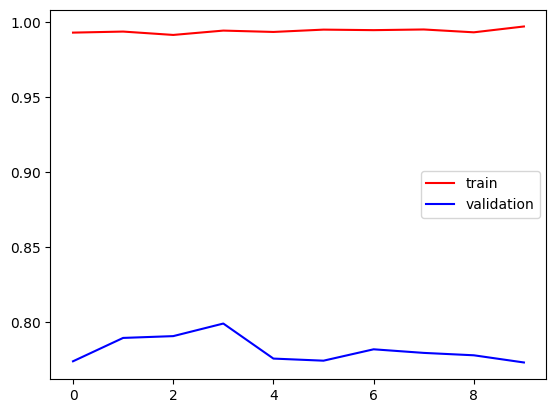

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

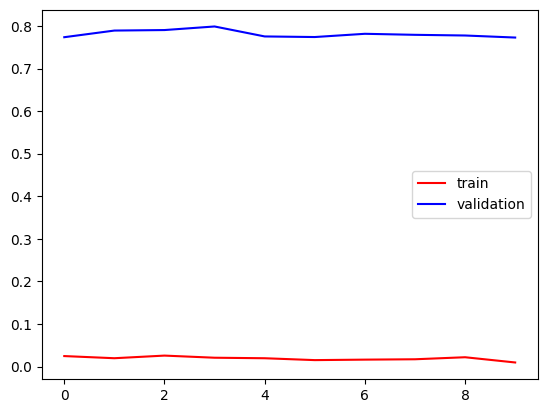

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()